In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel

In [7]:
url = 'https://raw.githubusercontent.com/KAIR-ISZ/lectures/main/Data%20Analytics/Lab%205/Airline_data.csv'
df = pd.read_csv(url)
print(df)
print(len(df))

   Year  Fatal accidents  Passenger deaths  Miles flown [100 mln miles]
0  1976               24               734                       3863.0
1  1977               25               516                       4300.0
2  1978               31               754                       5027.0
3  1979               31               877                       5481.0
4  1980               22               814                       5814.0
5  1981               21               362                       6033.0
6  1982               26               764                       5877.0
7  1983               20               809                       6223.0
8  1984               16               223                       7433.0
9  1985               22              1066                       7107.0
10


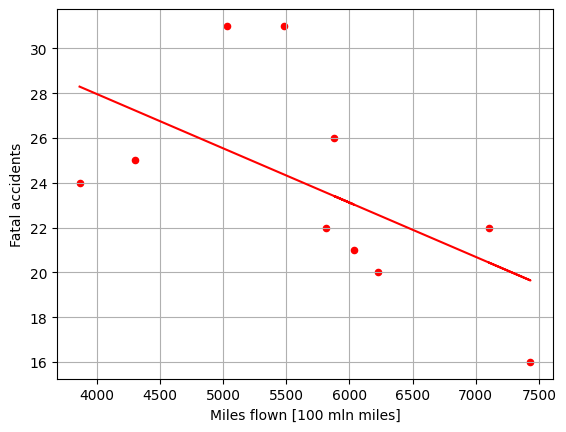

37.654277722061394 -0.00242385627944669
[3863. 4300. 5027. 5481. 5814. 6033. 5877. 6223. 7433. 7107.]


In [41]:
x = df["Miles flown [100 mln miles]"]
y = df['Fatal accidents']
df.plot(x="Miles flown [100 mln miles]", y="Fatal accidents", kind="scatter", grid=True, color = "r")
a, b = np.polyfit(df["Miles flown [100 mln miles]"], df["Fatal accidents"], 1)
plt.plot(x, a * x + b, color = "r")
plt.show()
print(b, a)
print(x.values)

In [15]:
data = {'N':len(df),'miles':x.values}

model_ppc = CmdStanModel(stan_file = 'Airline_prior.stan')
R = 1000
sim_model = model_ppc.sample(data = data, fixed_param = True)

17:19:00 - cmdstanpy - INFO - compiling stan file C:\Users\micha\Data_Analytics\Lab5\Airline_prior.stan to exe file C:\Users\micha\Data_Analytics\Lab5\Airline_prior.exe
17:19:16 - cmdstanpy - INFO - compiled model executable: C:\Users\micha\Data_Analytics\Lab5\Airline_prior.exe
17:19:16 - cmdstanpy - WARNING - Stan compiler has produced 3 warnings:
17:19:16 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/micha/Data_Analytics/Lab5/Airline_prior.hpp C:/Users/micha/Data_Analytics/Lab5/Airline_prior.stan
Warning in 'C:/Users/micha/Data_Analytics/Lab5/Airline_prior.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/micha/Data_Analytics/Lab5/Airline_prior.stan', line 9, column 3: Declaration
    of arrays b

chain 1 |          | 00:00 Status

17:19:16 - cmdstanpy - INFO - CmdStan done processing.


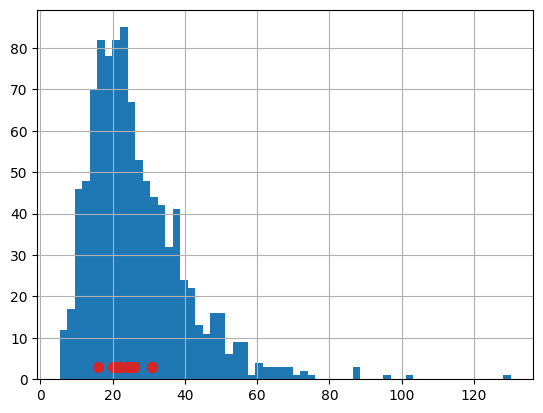

In [25]:
sim1 = sim_model.draws_pd()
sim1["Accidents"] = sim1[[f"y_sim[{i}]" for i in range(1,11)]].mean(axis=1)
sim1["Accidents"].hist(bins=60)
ys=np.full(
  shape=10,
  fill_value=3
)
plt.scatter(y,ys,s=50, color='tab:red')

In [32]:
data ={'N':len(df), 'miles':x.values, 'accidents':y}

model =CmdStanModel(stan_file='Airline_data.stan')

fit = model.sample(data=data)

17:34:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

17:34:37 - cmdstanpy - INFO - CmdStan done processing.
17:34:37 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 78 iterations at max treedepth (7.8%)
	Chain 2 had 59 iterations at max treedepth (5.9%)
	Use function "diagnose()" to see further information.


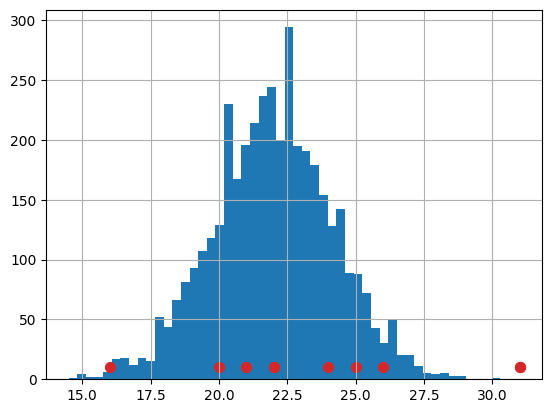

In [33]:
fit_pd = fit.draws_pd()
fit_pd["Accidents"] = fit_pd[[f"accidents_sim[{i}]" for i in range(1, 11)]].mean(axis=1)
fit_pd["Accidents"].hist(bins=50)
ys=np.full(
  shape=10,
  fill_value=10
)
plt.scatter(y,ys,s=50, color='tab:red')

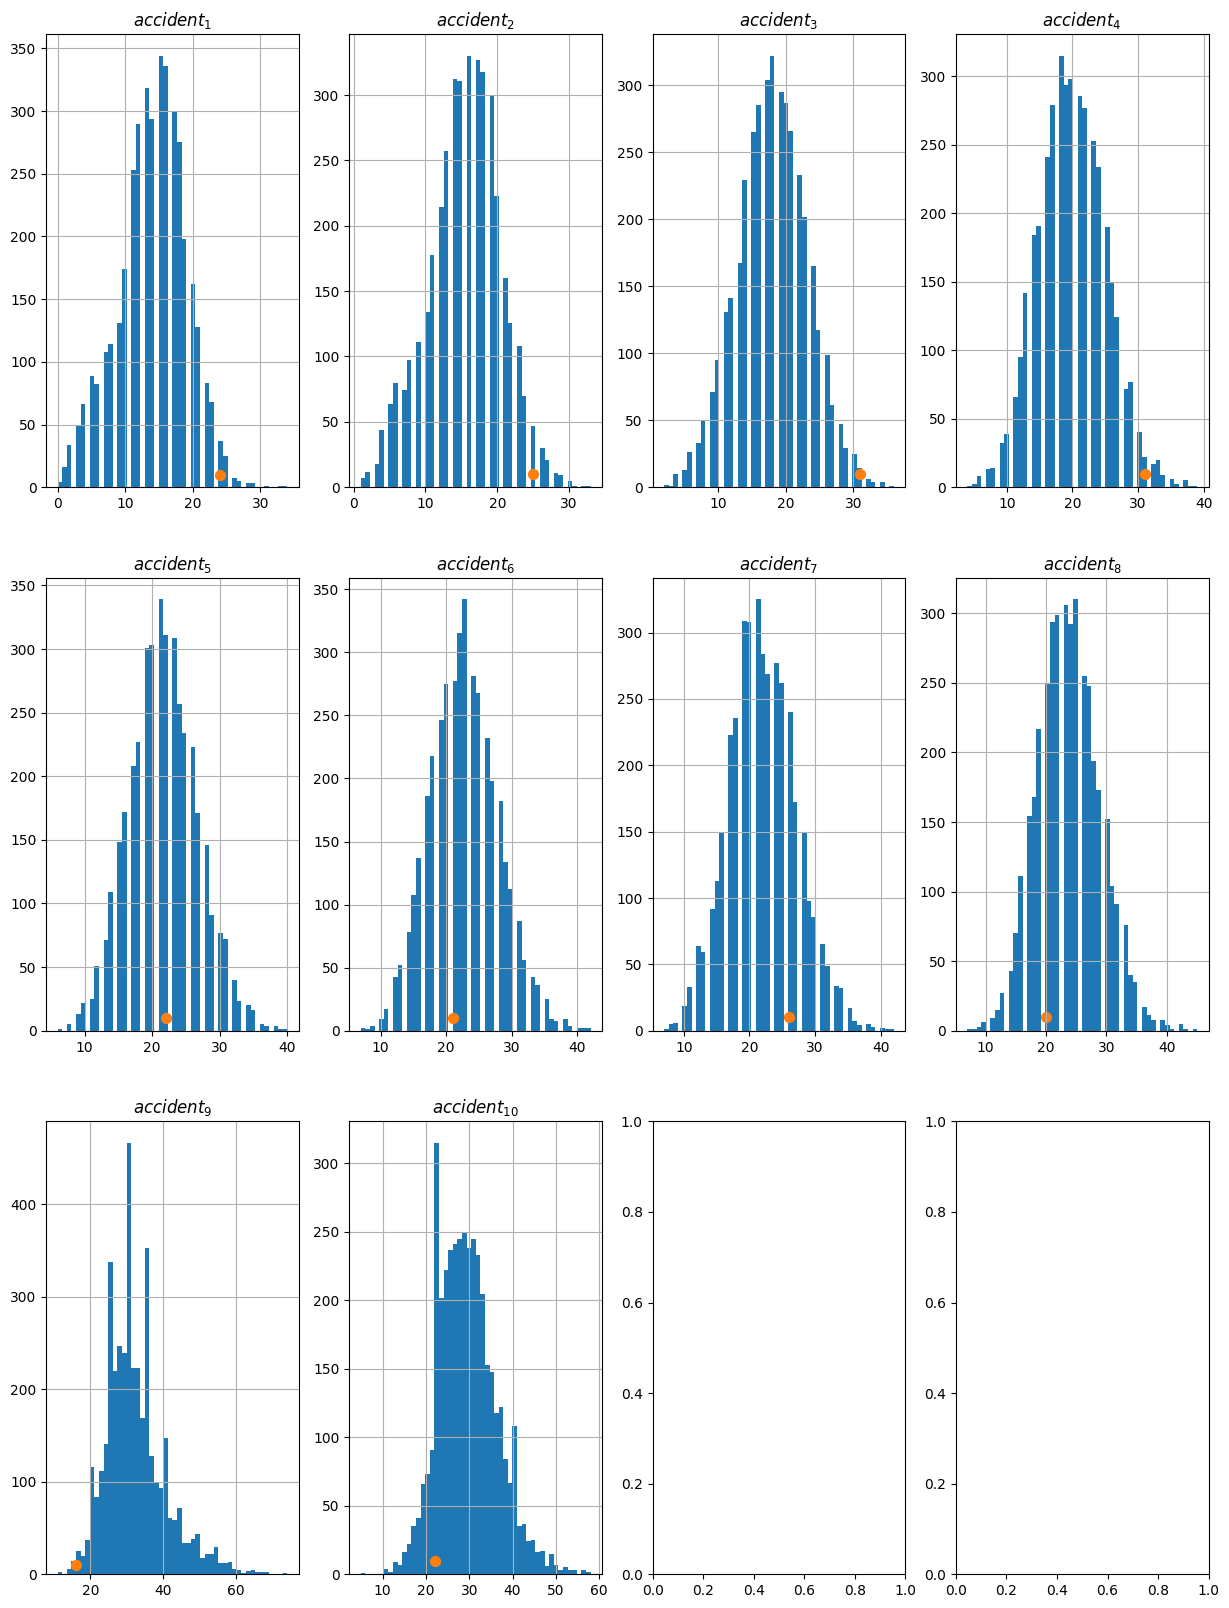

In [34]:
fig, ax = plt.subplots(3,4, figsize=(15,20))
for i in range(1,11):
    ax[(i-1)//4][(i-1)%4].hist(fit_pd[f"accidents_sim[{i}]"],bins=50)
    ax[(i-1)//4][(i-1)%4].scatter(y[i-1],[10],s=50, color='tab:orange')
    ax[(i-1)//4][(i-1)%4].set_title(f"$accident_{{{i}}}$")
    ax[(i-1)//4][(i-1)%4].grid()

In [35]:
data ={'N':len(df),'miles':x.values}

model = CmdStanModel(stan_file='Airline_prior_1.stan')

sim = model.sample(data=data, fixed_param=True)

17:41:34 - cmdstanpy - INFO - compiling stan file C:\Users\micha\Data_Analytics\Lab5\Airline_prior_1.stan to exe file C:\Users\micha\Data_Analytics\Lab5\Airline_prior_1.exe
17:42:04 - cmdstanpy - INFO - compiled model executable: C:\Users\micha\Data_Analytics\Lab5\Airline_prior_1.exe
17:42:04 - cmdstanpy - WARNING - Stan compiler has produced 4 warnings:
17:42:04 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/micha/Data_Analytics/Lab5/Airline_prior_1.hpp C:/Users/micha/Data_Analytics/Lab5/Airline_prior_1.stan
Warning in 'C:/Users/micha/Data_Analytics/Lab5/Airline_prior_1.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/micha/Data_Analytics/Lab5/Airline_prior_1.stan', line 7, column 3: Declaration
 

chain 1 |          | 00:00 Status

17:42:05 - cmdstanpy - INFO - CmdStan done processing.


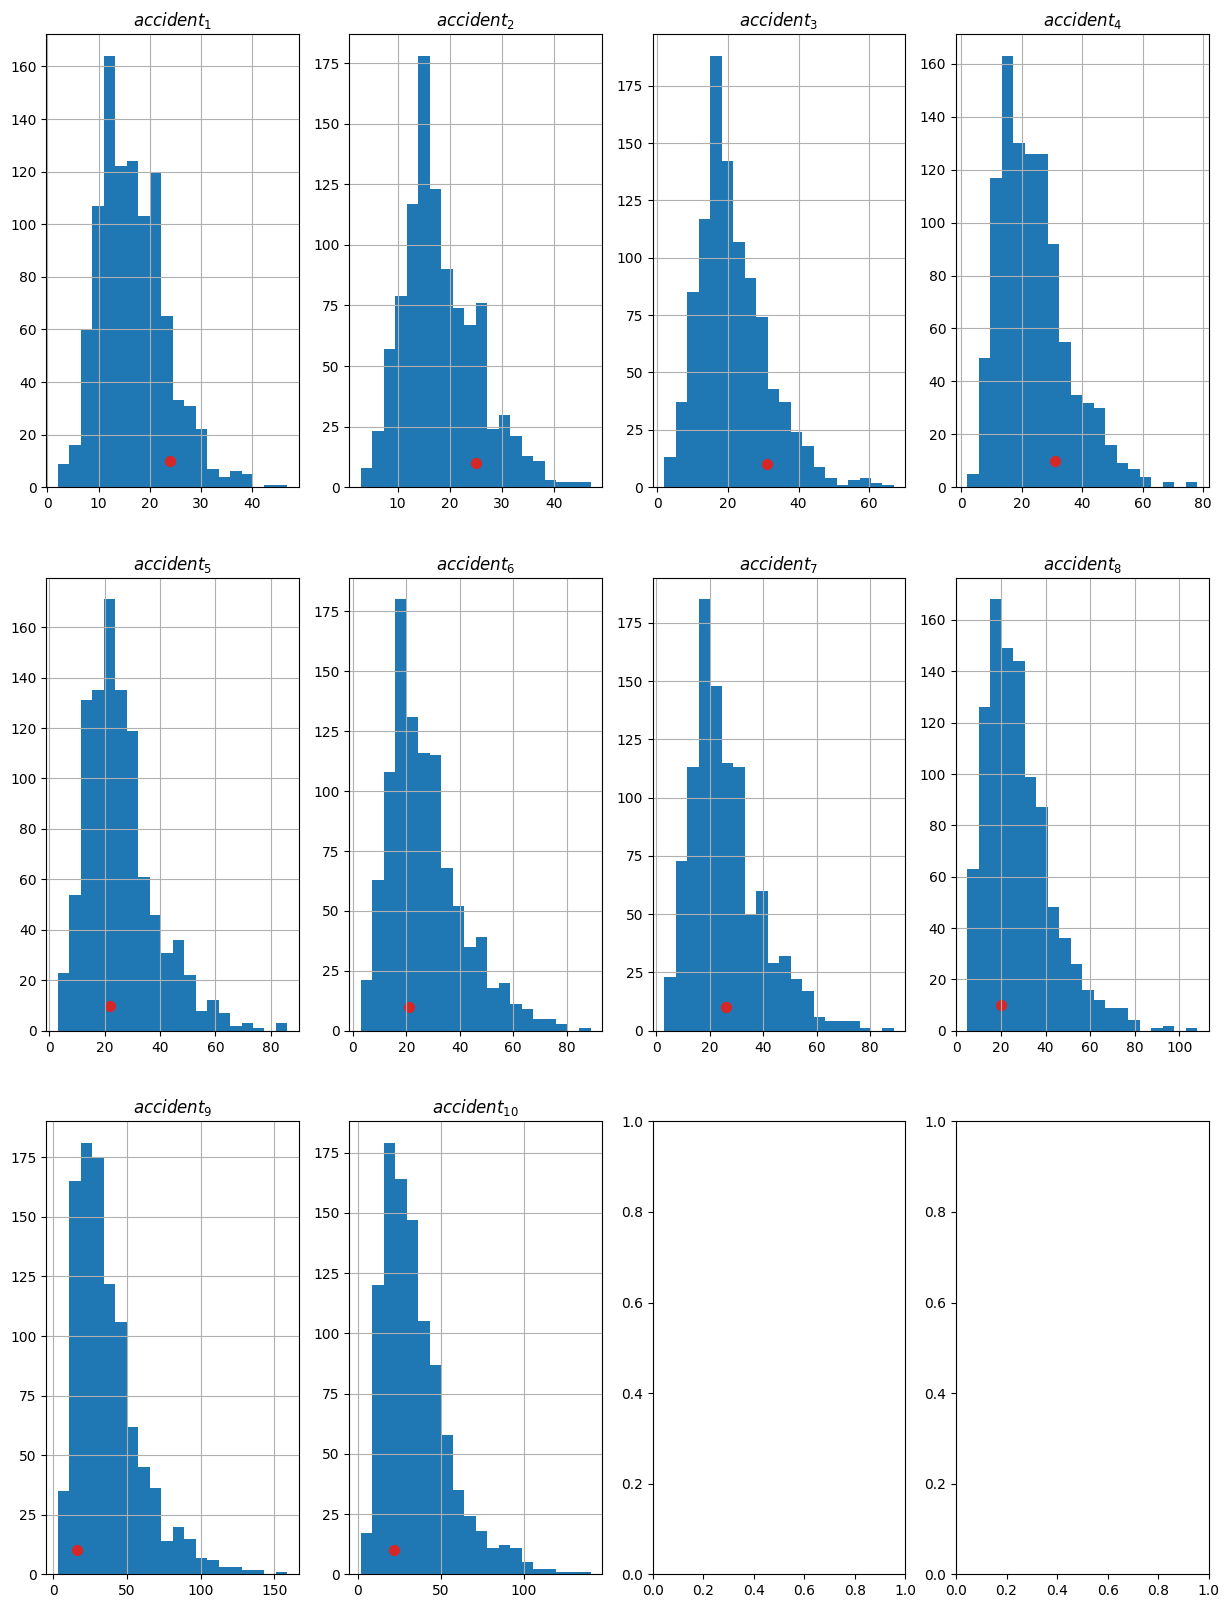

In [36]:
solo = sim .draws_pd()
fig, ax = plt.subplots(3,4, figsize=(15,20))
for i in range(1,11):
    ax[(i-1)//4][(i-1)%4].hist(solo[f"y_sim[{i}]"],bins=20)
    ax[(i-1)//4][(i-1)%4].scatter(y[i-1],[10],s=50, color='tab:red')
    ax[(i-1)//4][(i-1)%4].set_title(f"$accident_{{{i}}}$")
    ax[(i-1)//4][(i-1)%4].grid()